# # Classifiers comparison: decision trees and k-nearest neighbors on the dataset Iris


In the following program we compare the prediction results obtained by decision trees and k-nearest neighbors on the dataset Iris

The following cell shows the program training a decision tree and its results in prediction 

In [1]:
from sklearn import tree 
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score # will be used to separate training and test
from sklearn import neighbors
import numpy as np
import matplotlib.pyplot as plt
iris = load_iris()
clf = tree.DecisionTreeClassifier(criterion="entropy",random_state=300,min_samples_leaf=5,class_weight={0:1,1:1,2:1})
clf = clf.fit(iris.data, iris.target)
scores = cross_val_score(clf, iris.data, iris.target, cv=5) # score will be the accuracy
print(scores)


[ 0.96666667  1.          0.9         0.86666667  1.        ]


The following cell shows the training of k-nearest neighbors and its prediction results.
Here we use a uniform weighting setting (weights='uniform'): any neighbors weight the same in the majority voting aggregation.

In [2]:
n_neighbors = 11
clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf_knn2.fit(iris.data, iris.target)

myscore=0
for i in range(len(iris.target)):
    instance=(iris.data[i,:]).reshape(1, -1)
    predicted2=clf_knn2.predict(instance)[0]
    if iris.target[i]==predicted2:
        print(str(i)+" ok "+str(iris.target_names[iris.target[i]]))
        myscore=myscore+1
    else:
        print(str(i)+" nok "+"true class: "+str(iris.target_names[iris.target[i]])+"; predicted: "+str(iris.target_names[predicted2]))
myscore=myscore/float(len(iris.target))  
print(len(iris.target))
print("myscore="+str(myscore))
print("Classification score of k-nn without distance weighting")
scores2 = cross_val_score(clf_knn2, iris.data, iris.target, cv=5,scoring='accuracy') # score will be the accuracy
print(scores2)

0 ok setosa
1 ok setosa
2 ok setosa
3 ok setosa
4 ok setosa
5 ok setosa
6 ok setosa
7 ok setosa
8 ok setosa
9 ok setosa
10 ok setosa
11 ok setosa
12 ok setosa
13 ok setosa
14 ok setosa
15 ok setosa
16 ok setosa
17 ok setosa
18 ok setosa
19 ok setosa
20 ok setosa
21 ok setosa
22 ok setosa
23 ok setosa
24 ok setosa
25 ok setosa
26 ok setosa
27 ok setosa
28 ok setosa
29 ok setosa
30 ok setosa
31 ok setosa
32 ok setosa
33 ok setosa
34 ok setosa
35 ok setosa
36 ok setosa
37 ok setosa
38 ok setosa
39 ok setosa
40 ok setosa
41 ok setosa
42 ok setosa
43 ok setosa
44 ok setosa
45 ok setosa
46 ok setosa
47 ok setosa
48 ok setosa
49 ok setosa
50 ok versicolor
51 ok versicolor
52 ok versicolor
53 ok versicolor
54 ok versicolor
55 ok versicolor
56 ok versicolor
57 ok versicolor
58 ok versicolor
59 ok versicolor
60 ok versicolor
61 ok versicolor
62 ok versicolor
63 ok versicolor
64 ok versicolor
65 ok versicolor
66 ok versicolor
67 ok versicolor
68 ok versicolor
69 ok versicolor
70 ok versicolor
71 

In [ ]:
In the following we decide to keep in turn each instance for test, all the remaining for the training set.
Will the accuracy improve?

In [6]:
myscore=0
n_neighbors = 11
clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
for i in range(len(iris.target)):
    clf_knn2.fit(np.append(iris.data[:i,:], iris.data[i+1:,:]).reshape(iris.data.shape[0]-1,iris.data.shape[1]), np.append(iris.target[:i],iris.target[i+1:]))
    instance=(iris.data[i,:]).reshape(1, -1)
    predicted2=clf_knn2.predict(instance)[0]
    if iris.target[i]==predicted2:
        print(str(i)+" ok "+str(iris.target_names[iris.target[i]]))
        myscore=myscore+1
    else:
        print(str(i)+" nok "+"true class: "+str(iris.target_names[iris.target[i]])+"; predicted: "+str(iris.target_names[predicted2]))
myscore=myscore/float(len(iris.target))  
print(len(iris.target))
print("myscore="+str(myscore))
        

0 ok setosa
1 ok setosa
2 ok setosa
3 ok setosa
4 ok setosa
5 ok setosa
6 ok setosa
7 ok setosa
8 ok setosa
9 ok setosa
10 ok setosa
11 ok setosa
12 ok setosa
13 ok setosa
14 ok setosa
15 ok setosa
16 ok setosa
17 ok setosa
18 ok setosa
19 ok setosa
20 ok setosa
21 ok setosa
22 ok setosa
23 ok setosa
24 ok setosa
25 ok setosa
26 ok setosa
27 ok setosa
28 ok setosa
29 ok setosa
30 ok setosa
31 ok setosa
32 ok setosa
33 ok setosa
34 ok setosa
35 ok setosa
36 ok setosa
37 ok setosa
38 ok setosa
39 ok setosa
40 ok setosa
41 ok setosa
42 ok setosa
43 ok setosa
44 ok setosa
45 ok setosa
46 ok setosa
47 ok setosa
48 ok setosa
49 ok setosa
50 ok versicolor
51 ok versicolor
52 ok versicolor
53 ok versicolor
54 ok versicolor
55 ok versicolor
56 ok versicolor
57 ok versicolor
58 ok versicolor
59 ok versicolor
60 ok versicolor
61 ok versicolor
62 ok versicolor
63 ok versicolor
64 ok versicolor
65 ok versicolor
66 ok versicolor
67 ok versicolor
68 ok versicolor
69 ok versicolor
70 ok versicolor
71 

In the following cell we use a varying weighting setting (weights='distance'): any neighbors weights inversely with its distance to the test instance in the majority voting aggregation.

In [4]:
n_neighbors = 11
clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf_knn2.fit(iris.data, iris.target)

myscore=0
for i in range(len(iris.target)):
    instance=(iris.data[i,:]).reshape(1, -1)
    predicted2=clf_knn2.predict(instance)[0]
    if iris.target[i]==predicted2:
        print(str(i)+" ok "+str(iris.target_names[iris.target[i]]))
        myscore=myscore+1
    else:
        print(str(i)+" nok "+"true class: "+str(iris.target_names[iris.target[i]])+"; predicted: "+str(iris.target_names[predicted2]))
print(len(iris.target))
print("Classification score of k-nn without distance weighting")
scores2 = cross_val_score(clf_knn2, iris.data, iris.target, cv=5,scoring='accuracy') # score will be the accuracy
print(scores2)

0 ok setosa
1 ok setosa
2 ok setosa
3 ok setosa
4 ok setosa
5 ok setosa
6 ok setosa
7 ok setosa
8 ok setosa
9 ok setosa
10 ok setosa
11 ok setosa
12 ok setosa
13 ok setosa
14 ok setosa
15 ok setosa
16 ok setosa
17 ok setosa
18 ok setosa
19 ok setosa
20 ok setosa
21 ok setosa
22 ok setosa
23 ok setosa
24 ok setosa
25 ok setosa
26 ok setosa
27 ok setosa
28 ok setosa
29 ok setosa
30 ok setosa
31 ok setosa
32 ok setosa
33 ok setosa
34 ok setosa
35 ok setosa
36 ok setosa
37 ok setosa
38 ok setosa
39 ok setosa
40 ok setosa
41 ok setosa
42 ok setosa
43 ok setosa
44 ok setosa
45 ok setosa
46 ok setosa
47 ok setosa
48 ok setosa
49 ok setosa
50 ok versicolor
51 ok versicolor
52 ok versicolor
53 ok versicolor
54 ok versicolor
55 ok versicolor
56 ok versicolor
57 ok versicolor
58 ok versicolor
59 ok versicolor
60 ok versicolor
61 ok versicolor
62 ok versicolor
63 ok versicolor
64 ok versicolor
65 ok versicolor
66 ok versicolor
67 ok versicolor
68 ok versicolor
69 ok versicolor
70 ok versicolor
71 

In the following cell we make the tuning of the k-nn models setting the value of k (number of nearest neighbors). Find the best value of k (giving the maximum accuracy).

k neighbors=1
accuracy= 0.96
k neighbors=3
accuracy= 0.96
k neighbors=5
accuracy= 0.966666666667
k neighbors=7
accuracy= 0.966666666667
k neighbors=9
accuracy= 0.966666666667
k neighbors=11
accuracy= 0.973333333333
k neighbors=13
accuracy= 0.966666666667
k neighbors=15
accuracy= 0.973333333333
k neighbors=17
accuracy= 0.973333333333
k neighbors=19
accuracy= 0.98
k neighbors=21
accuracy= 0.98
k neighbors=23
accuracy= 0.966666666667
k neighbors=25
accuracy= 0.966666666667
k neighbors=27
accuracy= 0.966666666667
k neighbors=29
accuracy= 0.953333333333
k neighbors=31
accuracy= 0.946666666667
k neighbors=33
accuracy= 0.953333333333
k neighbors=35
accuracy= 0.953333333333
k neighbors=37
accuracy= 0.946666666667
k neighbors=39
accuracy= 0.953333333333
k neighbors=41
accuracy= 0.946666666667
k neighbors=43
accuracy= 0.94
k neighbors=45
accuracy= 0.946666666667
k neighbors=47
accuracy= 0.946666666667
k neighbors=49
accuracy= 0.94
k neighbors=51
accuracy= 0.92
k neighbors=53
accuracy= 0.93333333

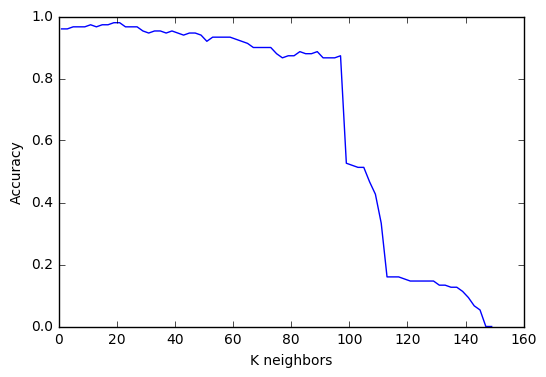

In [17]:
def create_and_train_KNeighborsClassifier(weights='uniform'):
    bestscore = 0
    bestngh = 0
    pltAcc = []
    pltNgh = []
    for ngh in range(1, iris.data.shape[0], 2):
        clf_knn2 = neighbors.KNeighborsClassifier(ngh, weights=weights)
        myscore=0
        #con cross validation = 150
        for i in range(len(iris.target)):
            clf_knn2.fit(np.append(iris.data[:i,:], iris.data[i+1:,:]).reshape(iris.data.shape[0]-1,iris.data.shape[1]), np.append(iris.target[:i],iris.target[i+1:]))
            instance=(iris.data[i,:]).reshape(1, -1)
            predicted2=clf_knn2.predict(instance)[0]
            if iris.target[i]==predicted2:
                myscore=myscore+1
        myscore=myscore/float(len(iris.target))
        #save and print accuracy and KNeighbors
        pltAcc.append(myscore)
        pltNgh.append(ngh)
        print "k neighbors=%s" % ngh
        print "accuracy= %s" % myscore
        #check if the accuracy is better
        if(myscore > bestscore):
            bestscore = myscore
            bestngh = ngh
    return bestscore, bestngh, pltAcc, pltNgh

bestscore, bestngh, pltAcc, pltNgh = create_and_train_KNeighborsClassifier() 
    
print "\nbest k=%s" % bestngh
print "best accuracy=%s" % bestscore

plt.plot(pltNgh,pltAcc)
plt.xlabel("K neighbors")
plt.ylabel("Accuracy")
plt.show()

In the following cell we plot in the same plot two subplots with the diagrams on accuracy with the two kinds of weighting 
of the vote of the neighbours (uniform and with distance)

k neighbors=1
accuracy= 0.96
k neighbors=3
accuracy= 0.96
k neighbors=5
accuracy= 0.966666666667
k neighbors=7
accuracy= 0.966666666667
k neighbors=9
accuracy= 0.966666666667
k neighbors=11
accuracy= 0.973333333333
k neighbors=13
accuracy= 0.966666666667
k neighbors=15
accuracy= 0.973333333333
k neighbors=17
accuracy= 0.973333333333
k neighbors=19
accuracy= 0.98
k neighbors=21
accuracy= 0.98
k neighbors=23
accuracy= 0.966666666667
k neighbors=25
accuracy= 0.966666666667
k neighbors=27
accuracy= 0.966666666667
k neighbors=29
accuracy= 0.953333333333
k neighbors=31
accuracy= 0.946666666667
k neighbors=33
accuracy= 0.953333333333
k neighbors=35
accuracy= 0.953333333333
k neighbors=37
accuracy= 0.946666666667
k neighbors=39
accuracy= 0.953333333333
k neighbors=41
accuracy= 0.946666666667
k neighbors=43
accuracy= 0.94
k neighbors=45
accuracy= 0.946666666667
k neighbors=47
accuracy= 0.946666666667
k neighbors=49
accuracy= 0.94
k neighbors=51
accuracy= 0.92
k neighbors=53
accuracy= 0.93333333

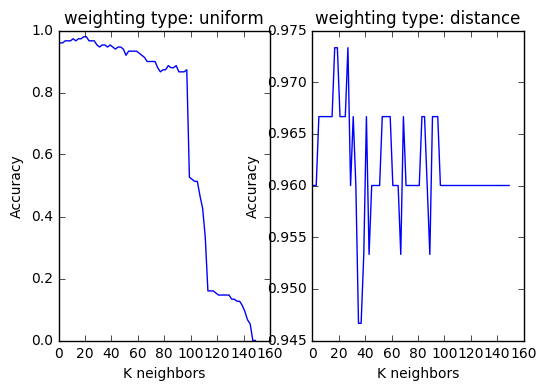

In [18]:
bestscore, bestngh, pltAcc, pltNgh = create_and_train_KNeighborsClassifier()
bestscoreDis, bestnghDis, pltAccDis, pltNghDis = create_and_train_KNeighborsClassifier(weights='distance')

plt.subplot(1, 2, 1)
plt.plot(pltNgh,pltAcc)
plt.title('weighting type: uniform')
plt.xlabel("K neighbors")
plt.ylabel("Accuracy")

plt.subplot(1, 2, 2)
plt.plot(pltNghDis,pltAccDis)
plt.title('weighting type: distance')
plt.xlabel("K neighbors")
plt.ylabel("Accuracy")

plt.show()

In the following cell we plot (overlapping) in the same picture both the diagrams on accuracy with the two kinds of weighting 
of the vote of the neighbours (uniform and with distance)

k neighbors=1
accuracy= 0.96
k neighbors=3
accuracy= 0.96
k neighbors=5
accuracy= 0.966666666667
k neighbors=7
accuracy= 0.966666666667
k neighbors=9
accuracy= 0.966666666667
k neighbors=11
accuracy= 0.973333333333
k neighbors=13
accuracy= 0.966666666667
k neighbors=15
accuracy= 0.973333333333
k neighbors=17
accuracy= 0.973333333333
k neighbors=19
accuracy= 0.98
k neighbors=21
accuracy= 0.98
k neighbors=23
accuracy= 0.966666666667
k neighbors=25
accuracy= 0.966666666667
k neighbors=27
accuracy= 0.966666666667
k neighbors=29
accuracy= 0.953333333333
k neighbors=31
accuracy= 0.946666666667
k neighbors=33
accuracy= 0.953333333333
k neighbors=35
accuracy= 0.953333333333
k neighbors=37
accuracy= 0.946666666667
k neighbors=39
accuracy= 0.953333333333
k neighbors=41
accuracy= 0.946666666667
k neighbors=43
accuracy= 0.94
k neighbors=45
accuracy= 0.946666666667
k neighbors=47
accuracy= 0.946666666667
k neighbors=49
accuracy= 0.94
k neighbors=51
accuracy= 0.92
k neighbors=53
accuracy= 0.93333333

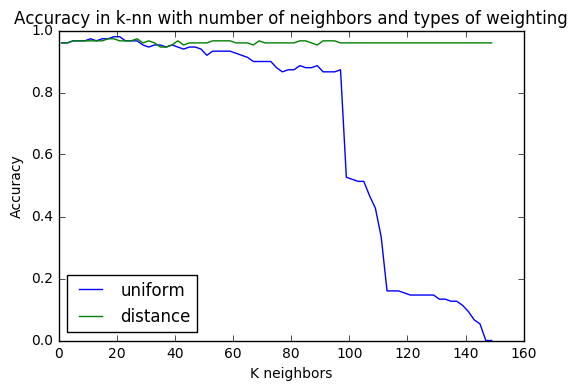

In [30]:
bestscore, bestngh, pltAcc, pltNgh = create_and_train_KNeighborsClassifier()
bestscoreDis, bestnghDis, pltAccDis, pltNghDis = create_and_train_KNeighborsClassifier(weights='distance')

lbl_uniform, = plt.plot(pltNgh, pltAcc, label='uniform')
lbl_distance, = plt.plot(pltNghDis, pltAccDis, label='distance')
plt.legend(handles=[lbl_uniform, lbl_distance],loc='lower left')
plt.title('Accuracy in k-nn with number of neighbors and types of weighting')
plt.xlabel("K neighbors")
plt.ylabel("Accuracy")
plt.show()